In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib

In [39]:
data = pd.read_excel('janus2.xlsx')

In [40]:
X = data[['a atomic no','b atomic no','c atomic no','a density','b density','c density','lattice parameter (ang)','e pbe']]
y = data[['e hse']]

In [41]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
y = y.values.ravel()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

In [43]:
gbr = GradientBoostingRegressor(learning_rate=1.0, n_estimators=100)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1.0)

Mean squared error for testing set: 0.12109134590328004
Root Mean Squared Error (RMSE): 0.34798181835159153
R 2 score : 0.9407817139036767


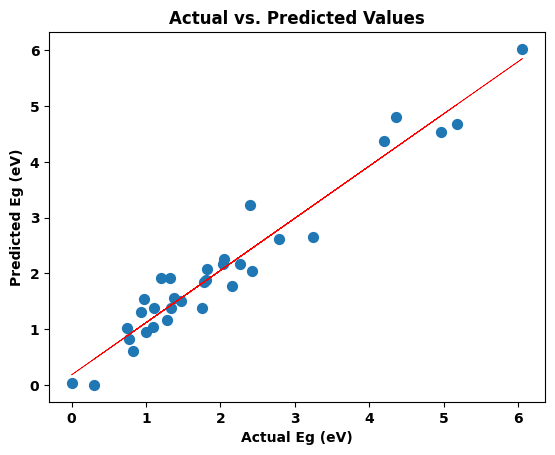

In [44]:
joblib.dump(gbr, 'gbr.pkl')
predictions = gbr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean squared error for testing set: {mse}")
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f"R 2 score : {r2}")

import matplotlib.pyplot as plt
plt.scatter(y_test, predictions, marker= 'o',s= 50, linewidths=1.0)
plt.xlabel("Actual Eg (eV)",weight='bold')
plt.ylabel("Predicted Eg (eV)",weight='bold')
plt.title("Actual vs. Predicted Values",weight='bold')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
fit = np.polyfit(y_test, predictions, deg=1)
plt.plot(y_test, fit[0] * y_test + fit[1], color='red', linewidth=0.5)
plt.savefig('hsegbr.png',dpi=400)
plt.show()

In [45]:
new_data = pd.DataFrame({
    'a atomic no':[42],
    'b atomic no':[34],
    'c atomic no':[16],
    'a density':[10280],
    'b density':[4819],
    'c density':[1960],
    'lattice parameter (ang)':[3.25],
    'e pbe':[1.45]
})
predictions = gbr.predict(new_data)
print(predictions)

[2.04511568]


WSSe

In [46]:
new_data = pd.DataFrame({
    'a atomic no':[74],
    'b atomic no':[34],
    'c atomic no':[16],
    'a density':[19250],
    'b density':[4819],
    'c density':[1960],
    'lattice parameter (ang)':[3.25],
    'e pbe':[1.40]
})
predictions = gbr.predict(new_data)
print(predictions)

[2.28833659]


SbSeI

In [47]:
new_data = pd.DataFrame({
    'a atomic no':[51],
    'b atomic no':[34],
    'c atomic no':[53],
    'a density':[6697],
    'b density':[4819],
    'c density':[4940],
    'lattice parameter (ang)':[4.02],
    'e pbe':[1.00]
})
predictions = gbr.predict(new_data)
print(predictions)

[1.52763933]


BiSeI

In [48]:
new_data = pd.DataFrame({
    'a atomic no':[83],
    'b atomic no':[34],
    'c atomic no':[53],
    'a density':[9780],
    'b density':[4819],
    'c density':[4940],
    'lattice parameter (ang)':[4.18],
    'e pbe':[1.15]
})
predictions = gbr.predict(new_data)
print(predictions)

[1.58491821]
